In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

In [63]:
temp_df = pd.read_csv('./cleaned_data/monthly_air_temp_1878_2023.csv')
rain_df = pd.read_csv('./cleaned_data/monthly_rain_1853_2024.csv')
insect_df = pd.read_csv('./cleaned_data/RISdata_rhopalosiphum_padi_1990_2020_monthly.csv')

In [64]:
rain_df.head()

,year,month,monthly_rainfall
0,1853,1,NaN
1,1854,1,41.8
2,1855,1,8.1
3,1856,1,56.0
4,1857,1,77.9


In [65]:
temp_df.head()

,year,month,monthly_air_temp
0,1878,1,4.285484
1,1879,1,-1.166129
2,1880,1,0.264516
3,1881,1,-0.943103
4,1882,1,4.212903


In [66]:
# get only 1990 to 2020 for temp and rain
temp_df = temp_df[(temp_df['year'] >= 1990) & (temp_df['year'] <= 2020)]
rain_df = rain_df[(rain_df['year'] >= 1990) & (rain_df['year'] <= 2020)]

In [67]:
rain_df.head()

,year,month,monthly_rainfall
137,1990,1,96.5
138,1991,1,83.0
139,1992,1,24.6
140,1993,1,89.5
141,1994,1,103.0


In [68]:
temp_df.head()

,year,month,monthly_air_temp
112,1990,1,5.845161
113,1991,1,3.056452
114,1992,1,3.616129
115,1993,1,5.730645
116,1994,1,4.859677


In [69]:
insect_df.head()

,Trap,Insect,year,month,Total,Trap Operating Days
0,Rothamsted,Rhopalosiphum padi,1990,4,19,730
1,Rothamsted,Rhopalosiphum padi,1990,5,345,1460
2,Rothamsted,Rhopalosiphum padi,1990,6,55,1460
3,Rothamsted,Rhopalosiphum padi,1990,7,72,1825
4,Rothamsted,Rhopalosiphum padi,1990,8,39,1095


In [70]:
# Merge temperature and rainfall data first
combined_df = pd.merge(temp_df, rain_df, on=['year', 'month'], how='outer')

# Merge with insect data
final_df = pd.merge(combined_df, insect_df, on=['year', 'month'], how='outer')

# Sort by year and month
final_df = final_df.sort_values(['year', 'month'])

# Reset index
final_df = final_df.reset_index(drop=True)



In [71]:
final_df

,year,month,monthly_air_temp,monthly_rainfall,Trap,Insect,Total,Trap Operating Days
0,1990,1,5.845161,96.5,NaN,NaN,NaN,NaN
1,1990,2,6.969643,108.5,NaN,NaN,NaN,NaN
2,1990,3,7.738710,16.3,NaN,NaN,NaN,NaN
3,1990,4,7.463333,26.5,Rothamsted,Rhopalosiphum padi,19.0,730.0
4,1990,5,12.067742,1.5,Rothamsted,Rhopalosiphum padi,345.0,1460.0
...,...,...,...,...,...,...,...,...
367,2020,8,18.551274,172.0,Rothamsted,Rhopalosiphum padi,50.0,1825.0
368,2020,9,14.652736,32.8,Rothamsted,Rhopalosiphum padi,379.0,1460.0
369,2020,10,10.863187,198.4,Rothamsted,Rhopalosiphum padi,152.0,1460.0
370,2020,11,8.450063,57.4,Rothamsted,Rhopalosiphum padi,36.0,1460.0


In [72]:
# remove Trap Insect and Trap Operating Days
final_df = final_df.drop(columns=['Trap', 'Insect', 'Trap Operating Days'])

In [73]:
final_df.head()

,year,month,monthly_air_temp,monthly_rainfall,Total
0,1990,1,5.845161,96.5,NaN
1,1990,2,6.969643,108.5,NaN
2,1990,3,7.738710,16.3,NaN
3,1990,4,7.463333,26.5,19.0
4,1990,5,12.067742,1.5,345.0


Missing data count:
year                  0
month                 0
monthly_air_temp      0
monthly_rainfall      0
Total               133
dtype: int64

Missing data percentage:
year                 0.000000
month                0.000000
monthly_air_temp     0.000000
monthly_rainfall     0.000000
Total               35.752688
dtype: float64


/var/folders/x_/64_qmlzn3v18smxqf7_c_8j40000gn/T/ipykernel_60013/3018070667.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_missing = final_df.groupby('year').apply(lambda x: x.isnull().sum())


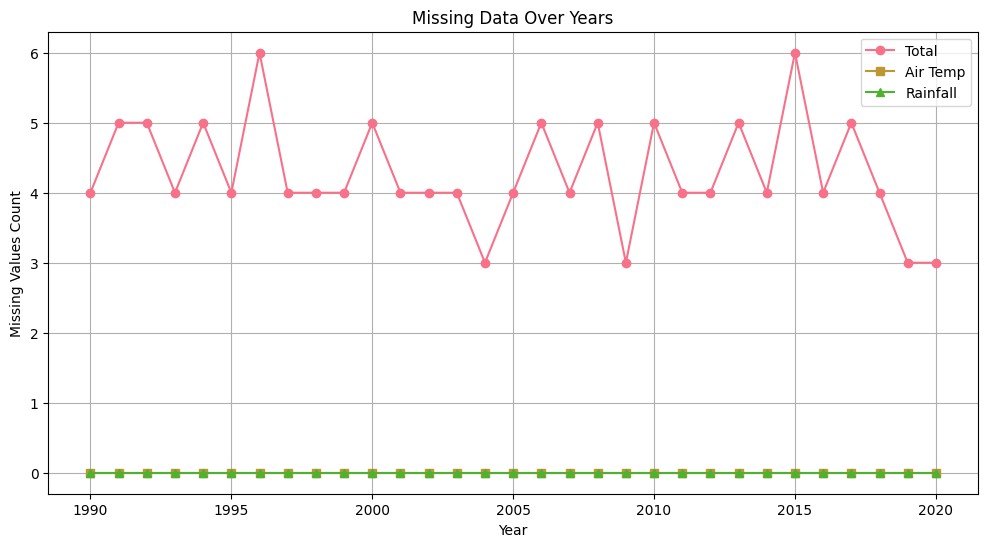

/var/folders/x_/64_qmlzn3v18smxqf7_c_8j40000gn/T/ipykernel_60013/3018070667.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_missing = final_df.groupby('month').apply(lambda x: x.isnull().sum())


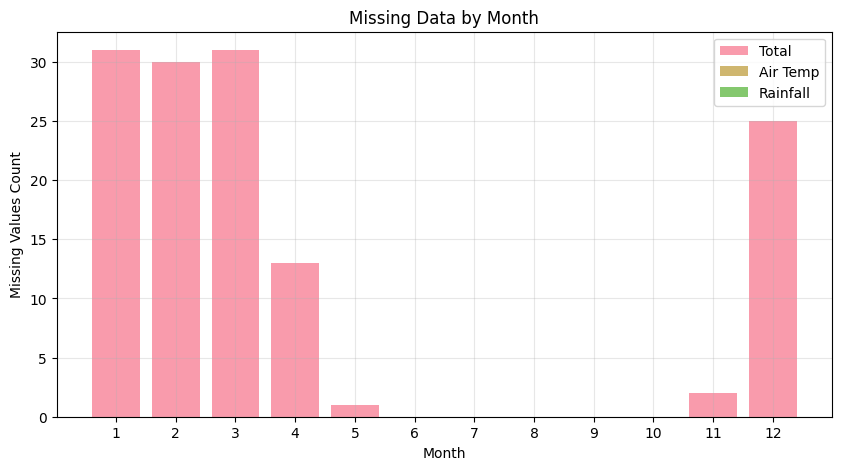

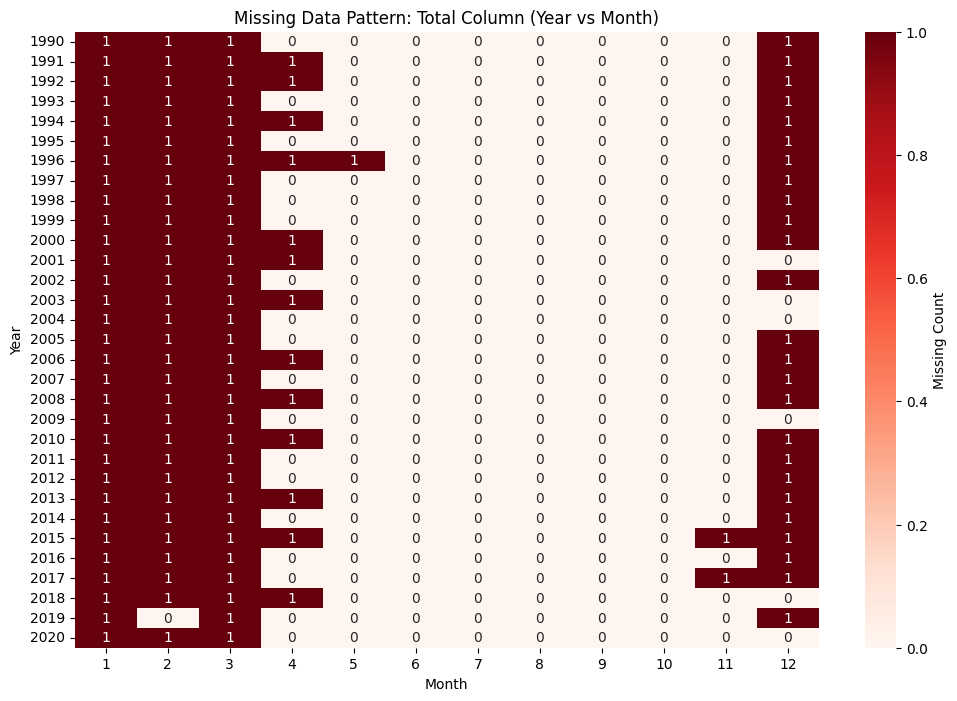

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic missing data info
print("Missing data count:")
print(final_df.isnull().sum())
print()
print("Missing data percentage:")
print((final_df.isnull().sum() / len(final_df)) * 100)


# Missing data over time (if you want to see pattern by year)
plt.figure(figsize=(12, 6))
yearly_missing = final_df.groupby('year').apply(lambda x: x.isnull().sum())
plt.plot(yearly_missing.index, yearly_missing['Total'], marker='o', label='Total')
plt.plot(yearly_missing.index, yearly_missing['monthly_air_temp'], marker='s', label='Air Temp')  
plt.plot(yearly_missing.index, yearly_missing['monthly_rainfall'], marker='^', label='Rainfall')
plt.title('Missing Data Over Years')
plt.xlabel('Year')
plt.ylabel('Missing Values Count')
plt.legend()
plt.grid(True)
plt.show()

# Missing data by month pattern
plt.figure(figsize=(10, 5))
monthly_missing = final_df.groupby('month').apply(lambda x: x.isnull().sum())
plt.bar(monthly_missing.index, monthly_missing['Total'], alpha=0.7, label='Total')
plt.bar(monthly_missing.index, monthly_missing['monthly_air_temp'], alpha=0.7, label='Air Temp')
plt.bar(monthly_missing.index, monthly_missing['monthly_rainfall'], alpha=0.7, label='Rainfall')
plt.title('Missing Data by Month')
plt.xlabel('Month')
plt.ylabel('Missing Values Count')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Heatmap showing year vs month missing pattern for Total column
plt.figure(figsize=(12, 8))
pivot_missing = final_df.pivot_table(index='year', columns='month', values='Total', aggfunc=lambda x: x.isnull().sum())
sns.heatmap(pivot_missing, cmap='Reds', annot=True, fmt='g', cbar_kws={'label': 'Missing Count'})
plt.title('Missing Data Pattern: Total Column (Year vs Month)')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

In [75]:
# remove in the Total column is NaN
final_df = final_df[~final_df['Total'].isna()]

In [76]:
final_df.head()

,year,month,monthly_air_temp,monthly_rainfall,Total
3,1990,4,7.463333,26.5,19.0
4,1990,5,12.067742,1.5,345.0
5,1990,6,13.161667,51.7,55.0
6,1990,7,16.808065,14.8,72.0
7,1990,8,18.182258,52.1,39.0


# model prediction 


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


In [78]:
# Prepare features and target using only the original columns
X = final_df[['monthly_air_temp', 'monthly_rainfall', 'month']]
y = final_df['Total']

# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (191, 3)
Test set size: (48, 3)


In [79]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"\nLinear Regression Results:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")

# Show coefficients
print(f"\nModel Coefficients:")
print(f"Temperature coefficient: {model.coef_[0]:.2f}")
print(f"Rainfall coefficient: {model.coef_[1]:.2f}")
print(f"Month coefficient: {model.coef_[2]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Linear Regression Results:
R² Score: 0.039
RMSE: 754.9
MAE: 399.2

Model Coefficients:
Temperature coefficient: 26.92
Rainfall coefficient: -0.70
Month coefficient: 70.99
Intercept: -578.02


In [80]:
# Show coefficients
print(f"\nModel Coefficients:")
print(f"Temperature coefficient: {model.coef_[0]:.2f}")
print(f"Rainfall coefficient: {model.coef_[1]:.2f}")
print(f"Month coefficient: {model.coef_[2]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Model Coefficients:
Temperature coefficient: 26.92
Rainfall coefficient: -0.70
Month coefficient: 70.99
Intercept: -578.02


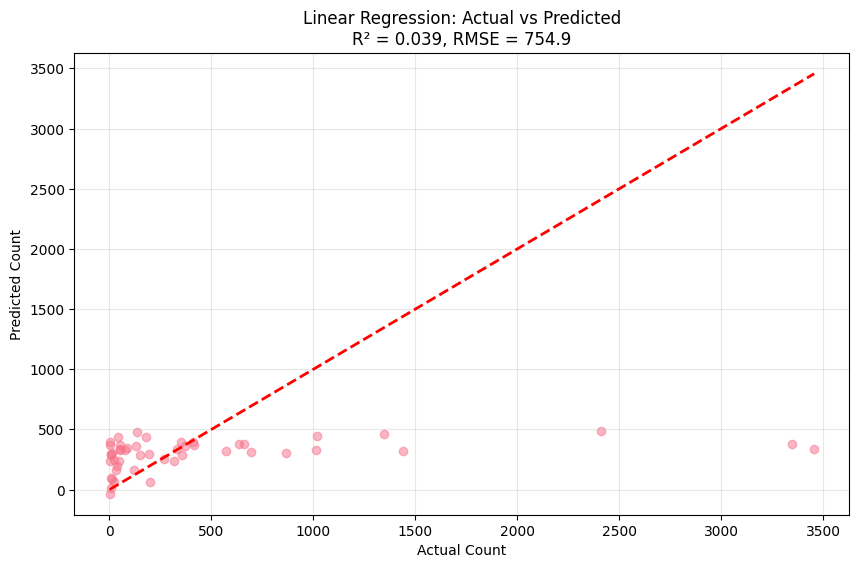


Example Predictions:
Month 5: Temp=10°C, Rain=40mm → Predicted count: 18
Month 7: Temp=18°C, Rain=20mm → Predicted count: 389
Month 12: Temp=5°C, Rain=60mm → Predicted count: 366


/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [81]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title(f'Linear Regression: Actual vs Predicted\nR² = {r2:.3f}, RMSE = {rmse:.1f}')
plt.grid(True, alpha=0.3)
plt.show()

# Example predictions
print("\n" + "="*50)
print("Example Predictions:")
print("="*50)

examples = [
    {'temp': 10, 'rain': 40, 'month': 5},  # May
    {'temp': 18, 'rain': 20, 'month': 7},  # July
    {'temp': 5, 'rain': 60, 'month': 12}   # December
]

for ex in examples:
    pred = model.predict([[ex['temp'], ex['rain'], ex['month']]])[0]
    print(f"Month {ex['month']}: Temp={ex['temp']}°C, Rain={ex['rain']}mm → Predicted count: {pred:.0f}")

## model 2  - remove the missing months

In [82]:
# remove if the month is 1,2,3 and 12

final_df_2 = final_df[~final_df['month'].isin([1, 2, 3, 12])]

In [83]:

# Prepare features and target using only the original columns
X = final_df_2[['monthly_air_temp', 'monthly_rainfall', 'month']]
y = final_df_2['Total']

# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (185, 3)
Test set size: (47, 3)


In [84]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"\nLinear Regression Results:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")

# Show coefficients
print(f"\nModel Coefficients:")
print(f"Temperature coefficient: {model.coef_[0]:.2f}")
print(f"Rainfall coefficient: {model.coef_[1]:.2f}")
print(f"Month coefficient: {model.coef_[2]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Linear Regression Results:
R² Score: 0.049
RMSE: 898.1
MAE: 407.1

Model Coefficients:
Temperature coefficient: 22.67
Rainfall coefficient: -1.26
Month coefficient: 80.46
Intercept: -556.05


In [85]:
# add polinomial feature PolynomialFeatures

Data shape: (232, 5)
Months present: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]
Count statistics:
count     232.000000
mean      314.900862
std       610.441458
min         1.000000
25%        23.000000
50%        91.000000
75%       318.500000
max      4684.000000
Name: Total, dtype: float64

Linear Regression Results:
R² Score: 0.164
RMSE: 842.2
MAE: 360.4

Ridge Regression Results:
R² Score: 0.163
RMSE: 842.7
MAE: 360.4

Best model: Linear Regression


/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

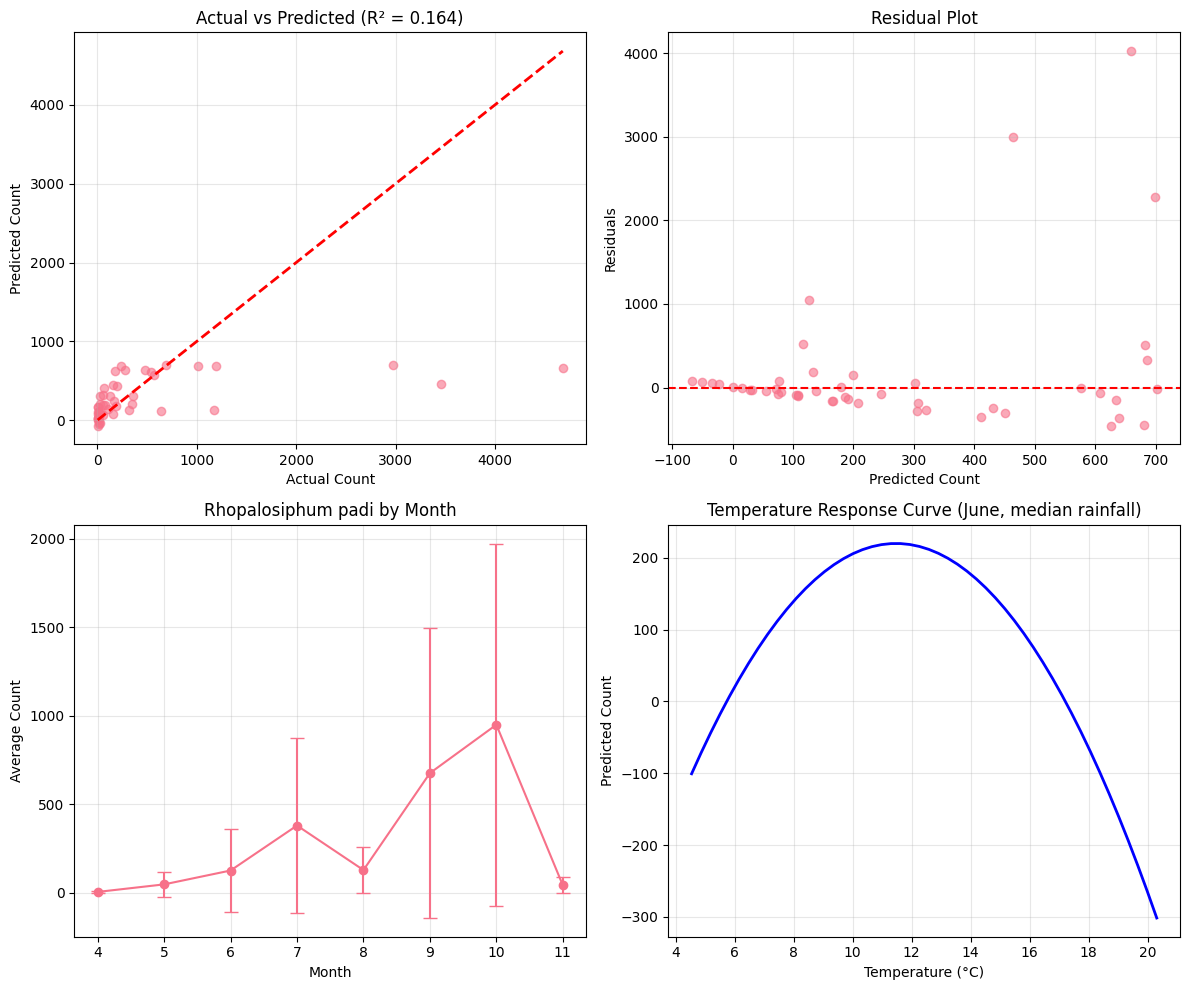


Top 5 Most Important Features:
      Feature  Coefficient
2       month   -62.171520
0        temp    58.624239
5  temp*month    18.167753
3      temp^2    -6.676093
1        rain     4.958157

Predictions for Rhopalosiphum padi:
Month  5: Temp=12°C, Rain=40mm → Predicted: 93 aphids
Month  6: Temp=15°C, Rain=30mm → Predicted: 159 aphids
Month  7: Temp=18°C, Rain=20mm → Predicted: 223 aphids
Month  9: Temp=14°C, Rain=50mm → Predicted: 650 aphids


/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Filter for Rhopalosiphum padi only and active months (4-11)
rhopalosiphum_df = final_df_2[final_df_2['month'].between(4, 11)].copy()

print(f"Data shape: {rhopalosiphum_df.shape}")
print(f"Months present: {sorted(rhopalosiphum_df['month'].unique())}")
print(f"Count statistics:\n{rhopalosiphum_df['Total'].describe()}")

# Create polynomial features (captures non-linear relationships)
poly = PolynomialFeatures(degree=2, include_bias=False)
X = rhopalosiphum_df[['monthly_air_temp', 'monthly_rainfall', 'month']]
X_poly = poly.fit_transform(X)

# Get feature names for interpretation
feature_names = ['temp', 'rain', 'month', 'temp^2', 'temp*rain', 'temp*month', 
                 'rain^2', 'rain*month', 'month^2']

y = rhopalosiphum_df['Total']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Try both Linear and Ridge regression
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'r2': r2, 'rmse': rmse, 'mae': mae, 'pred': y_pred, 'model': model}
    
    print(f"\n{name} Results:")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.1f}")
    print(f"MAE: {mae:.1f}")

# Use the better model
best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']
y_pred = results[best_model_name]['pred']

print(f"\nBest model: {best_model_name}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.6)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Count')
axes[0, 0].set_ylabel('Predicted Count')
axes[0, 0].set_title(f'Actual vs Predicted (R² = {results[best_model_name]["r2"]:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Count')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Monthly patterns
monthly_avg = rhopalosiphum_df.groupby('month')['Total'].agg(['mean', 'std'])
axes[1, 0].errorbar(monthly_avg.index, monthly_avg['mean'], yerr=monthly_avg['std'], 
                    marker='o', capsize=5)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Count')
axes[1, 0].set_title('Rhopalosiphum padi by Month')
axes[1, 0].grid(True, alpha=0.3)

# 4. Temperature response curve
temp_range = np.linspace(rhopalosiphum_df['monthly_air_temp'].min(), 
                        rhopalosiphum_df['monthly_air_temp'].max(), 50)
predictions_by_temp = []

for temp in temp_range:
    # Use median rainfall and peak month (June=6) for prediction
    X_temp = np.array([[temp, rhopalosiphum_df['monthly_rainfall'].median(), 6]])
    X_temp_poly = poly.transform(X_temp)
    predictions_by_temp.append(best_model.predict(X_temp_poly)[0])

axes[1, 1].plot(temp_range, predictions_by_temp, 'b-', linewidth=2)
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Predicted Count')
axes[1, 1].set_title('Temperature Response Curve (June, median rainfall)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance (coefficient magnitudes)
coef_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_model.coef_,
    'Abs_Coefficient': np.abs(best_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nTop 5 Most Important Features:")
print(coef_importance[['Feature', 'Coefficient']].head())

# Make predictions for different scenarios
print("\n" + "="*50)
print("Predictions for Rhopalosiphum padi:")
print("="*50)

scenarios = [
    {'month': 5, 'temp': 12, 'rain': 40},  # May - moderate
    {'month': 6, 'temp': 15, 'rain': 30},  # June - warm, dry
    {'month': 7, 'temp': 18, 'rain': 20},  # July - hot, dry
    {'month': 9, 'temp': 14, 'rain': 50},  # September - cooling
]

for s in scenarios:
    X_scenario = np.array([[s['temp'], s['rain'], s['month']]])
    X_scenario_poly = poly.transform(X_scenario)
    pred = best_model.predict(X_scenario_poly)[0]
    pred = max(0, pred)  # Ensure non-negative
    print(f"Month {s['month']:2d}: Temp={s['temp']}°C, Rain={s['rain']}mm → Predicted: {pred:.0f} aphids")

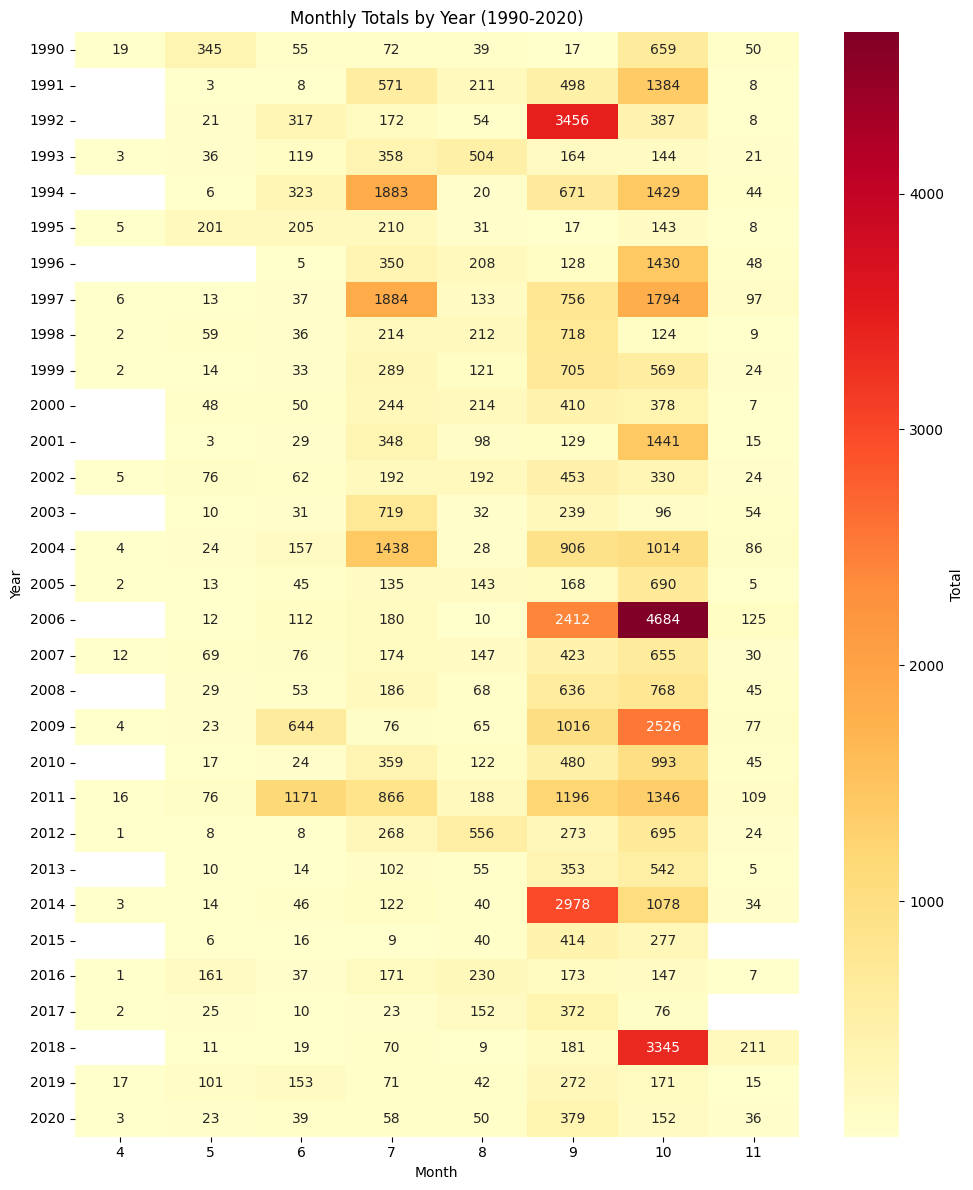

In [87]:
# final_df_2  visualise
# Create pivot table (matrix)
matrix = final_df_2.pivot(index='year', columns='month', values='Total')

# Create heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(matrix, 
            annot=True,           # Show numbers
            fmt='.0f',            # No decimals
            cmap='YlOrRd',        # Color scheme
            cbar_kws={'label': 'Total'})

plt.title('Monthly Totals by Year (1990-2020)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# final model with log transformation


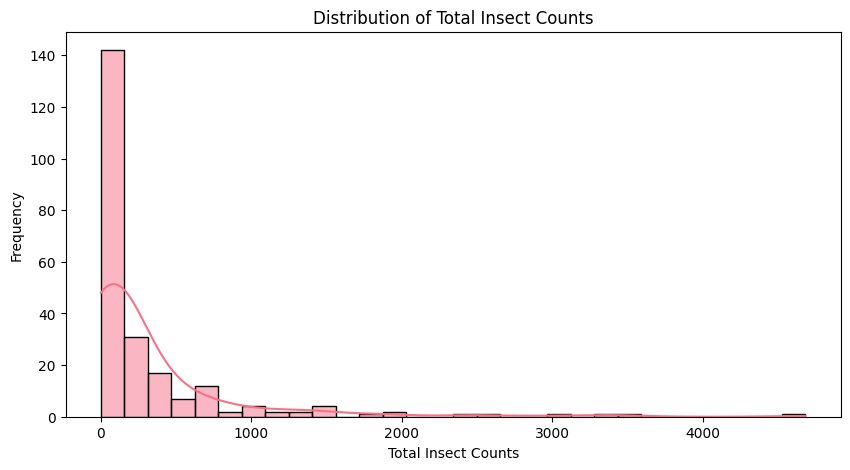

In [88]:
# check the distribution of the Total column
plt.figure(figsize=(10, 5))
sns.histplot(final_df_2['Total'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total Insect Counts')
plt.xlabel('Total Insect Counts')
plt.ylabel('Frequency')
plt.show()

In [89]:
final_df_2['Total_log'] = np.log1p(final_df_2['Total'])  # log1p handles zeros better


/var/folders/x_/64_qmlzn3v18smxqf7_c_8j40000gn/T/ipykernel_60013/3244337638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_2['Total_log'] = np.log1p(final_df_2['Total'])  # log1p handles zeros better


In [90]:
final_df_2.head()

,year,month,monthly_air_temp,monthly_rainfall,Total,Total_log
3,1990,4,7.463333,26.5,19.0,2.995732
4,1990,5,12.067742,1.5,345.0,5.846439
5,1990,6,13.161667,51.7,55.0,4.025352
6,1990,7,16.808065,14.8,72.0,4.290459
7,1990,8,18.182258,52.1,39.0,3.688879


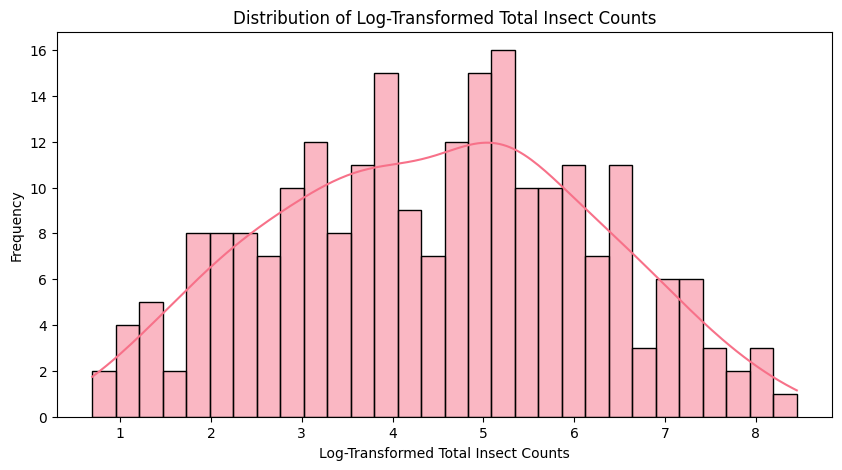

In [91]:
# check the distribution of Total_log
plt.figure(figsize=(10, 5))
sns.histplot(final_df_2['Total_log'].dropna(), bins=30, kde=True)
plt.title('Distribution of Log-Transformed Total Insect Counts')
plt.xlabel('Log-Transformed Total Insect Counts')
plt.ylabel('Frequency')
plt.show()

Data shape: (232, 6)
Months present: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]

Training set size: (185, 3)
Test set size: (47, 3)

Linear Regression Results (Log-transformed):
R² Score (log scale): 0.442
R² Score (original scale): -0.058
RMSE (original scale): 947.6
MAE (original scale): 380.6

Model Coefficients (log scale):
Temperature coefficient: 0.217
Rainfall coefficient: -0.0034
Month coefficient: 0.460
Intercept: -1.732


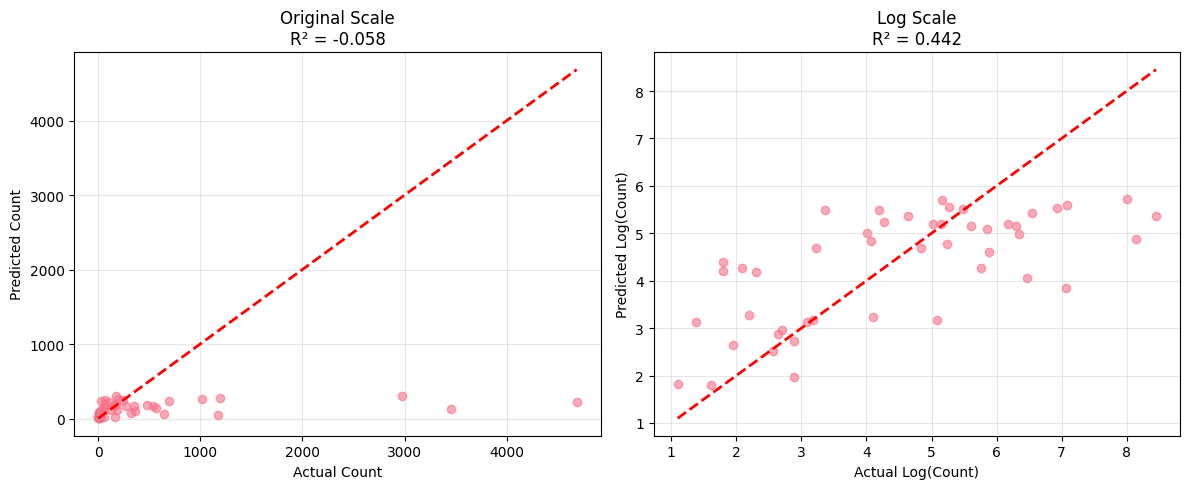


Example Predictions for Rhopalosiphum padi:
Month  5: Temp=12°C, Rain=40mm → Predicted:     21 aphids
Month  6: Temp=15°C, Rain=30mm → Predicted:     65 aphids
Month  7: Temp=18°C, Rain=20mm → Predicted:    205 aphids
Month  9: Temp=14°C, Rain=50mm → Predicted:    195 aphids
Month 10: Temp=10°C, Rain=60mm → Predicted:    125 aphids


/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with f

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Filter for active months (4-11) where insects are present
active_months_df = final_df_2[final_df_2['month'].between(4, 11)].copy()

print(f"Data shape: {active_months_df.shape}")
print(f"Months present: {sorted(active_months_df['month'].unique())}")

# Prepare features and target (using log-transformed target)
X = active_months_df[['monthly_air_temp', 'monthly_rainfall', 'month']]
y = active_months_df['Total_log']  # Using log-transformed target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions (in log space)
y_pred_log = model.predict(X_test)

# Convert predictions back to original scale
y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test)

# Calculate metrics on original scale
r2 = r2_score(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mae = mean_absolute_error(y_test_original, y_pred)

# Also calculate R² on log scale (for model quality)
r2_log = r2_score(y_test, y_pred_log)

print(f"\nLinear Regression Results (Log-transformed):")
print(f"R² Score (log scale): {r2_log:.3f}")
print(f"R² Score (original scale): {r2:.3f}")
print(f"RMSE (original scale): {rmse:.1f}")
print(f"MAE (original scale): {mae:.1f}")

print(f"\nModel Coefficients (log scale):")
print(f"Temperature coefficient: {model.coef_[0]:.3f}")
print(f"Rainfall coefficient: {model.coef_[1]:.4f}")
print(f"Month coefficient: {model.coef_[2]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Actual vs Predicted (original scale)
axes[0].scatter(y_test_original, y_pred, alpha=0.6)
axes[0].plot([y_test_original.min(), y_test_original.max()], 
             [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Count')
axes[0].set_ylabel('Predicted Count')
axes[0].set_title(f'Original Scale\nR² = {r2:.3f}')
axes[0].grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted (log scale)
axes[1].scatter(y_test, y_pred_log, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Log(Count)')
axes[1].set_ylabel('Predicted Log(Count)')
axes[1].set_title(f'Log Scale\nR² = {r2_log:.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example predictions
print("\n" + "="*50)
print("Example Predictions for Rhopalosiphum padi:")
print("="*50)

scenarios = [
    {'month': 5, 'temp': 12, 'rain': 40},   # May
    {'month': 6, 'temp': 15, 'rain': 30},   # June  
    {'month': 7, 'temp': 18, 'rain': 20},   # July
    {'month': 9, 'temp': 14, 'rain': 50},   # September
    {'month': 10, 'temp': 10, 'rain': 60},  # October
]

for s in scenarios:
    # Predict in log space
    log_pred = model.predict([[s['temp'], s['rain'], s['month']]])[0]
    # Convert to original scale
    pred = np.exp(log_pred)
    
    print(f"Month {s['month']:2d}: Temp={s['temp']:2d}°C, Rain={s['rain']:2d}mm → Predicted: {pred:6.0f} aphids")

# Show prediction confidence intervals (approxim

In [94]:
def predict_insect_count(temperature, rainfall, month, model=model, show_range=True):
    """
    Predict Rhopalosiphum padi count based on weather conditions
    
    Parameters:
    -----------
    temperature : float
        Monthly average air temperature in °C
    rainfall : float
        Monthly total rainfall in mm
    month : int
        Month number (4-11, as winter months have no insects)
    model : sklearn model
        Trained linear regression model (default: uses the trained model)
    show_range : bool
        Whether to show confidence range (default: True)
    
    Returns:
    --------
    dict : Dictionary with prediction and details
    """
    
    # Validate inputs
    if month < 4 or month > 11:
        print(f"⚠️ Warning: Month {month} is outside active season (4-11). Insects are typically absent in winter.")
    
    if temperature < 0 or temperature > 30:
        print(f"⚠️ Warning: Temperature {temperature}°C seems unusual for the UK.")
    
    if rainfall < 0 or rainfall > 300:
        print(f"⚠️ Warning: Rainfall {rainfall}mm seems unusual.")
    
    # Make prediction in log space
    log_prediction = model.predict([[temperature, rainfall, month]])[0]
    
    # Convert to original scale
    prediction = np.exp(log_prediction)
    
    # Calculate confidence range (using residual std from training)
    if show_range:
        # You'll need to calculate this once after training
        # For now, using approximate value
        std_error = 0.8  # Replace with actual: np.std(y_test - y_pred_log)
        lower_bound = np.exp(log_prediction - std_error)
        upper_bound = np.exp(log_prediction + std_error)
    
    # Print results
    print("\n" + "="*50)
    print("🦟 RHOPALOSIPHUM PADI PREDICTION")
    print("="*50)
    
    month_names = {4: 'April', 5: 'May', 6: 'June', 7: 'July', 
                   8: 'August', 9: 'September', 10: 'October', 11: 'November'}
    
    print(f"\n📅 Month: {month_names.get(month, f'Month {month}')}")
    print(f"🌡️  Temperature: {temperature:.1f}°C")
    print(f"💧 Rainfall: {rainfall:.1f}mm")
    print(f"\n✅ Predicted Count: {prediction:.0f} aphids")
    
    if show_range:
        print(f"📊 Confidence Range: {lower_bound:.0f} - {upper_bound:.0f} aphids")
    
    # Interpretation
    if prediction < 100:
        level = "Low"
        desc = "Minimal pest pressure expected"
    elif prediction < 500:
        level = "Moderate"
        desc = "Some pest activity, monitor fields"
    elif prediction < 1000:
        level = "High"
        desc = "Significant pest pressure, consider intervention"
    else:
        level = "Very High"
        desc = "Outbreak conditions, immediate action recommended"
    
    print(f"\n⚡ Risk Level: {level}")
    print(f"💡 {desc}")
    print("="*50)
    
    # Return dictionary for programmatic use
    result = {
        'prediction': prediction,
        'risk_level': level,
        'month': month,
        'temperature': temperature,
        'rainfall': rainfall
    }
    
    if show_range:
        result['lower_bound'] = lower_bound
        result['upper_bound'] = upper_bound
    
    return result

# Test the function
print("Testing the prediction function:")

# Example 1: Typical June conditions
result1 = predict_insect_count(temperature=15, rainfall=30, month=6)


Testing the prediction function:

🦟 RHOPALOSIPHUM PADI PREDICTION

📅 Month: June
🌡️  Temperature: 15.0°C
💧 Rainfall: 30.0mm

✅ Predicted Count: 65 aphids
📊 Confidence Range: 29 - 145 aphids

⚡ Risk Level: Low
💡 Minimal pest pressure expected


/Users/ft/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


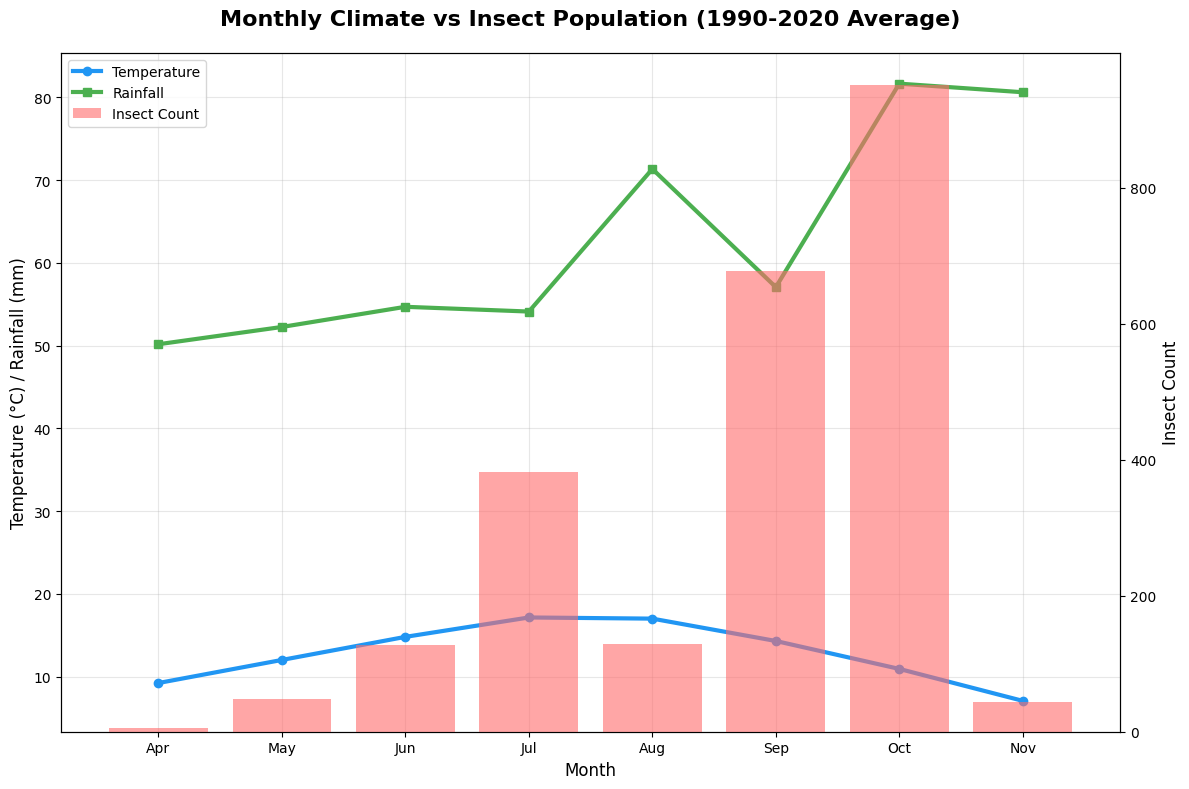

Monthly Averages (1990-2020):
  month_name  monthly_air_temp  monthly_rainfall   Total
0        Apr              9.23             50.17    5.94
1        May             12.02             52.26   48.57
2        Jun             14.81             54.70  126.90
3        Jul             17.15             54.12  381.10
4        Aug             17.01             71.35  129.48
5        Sep             14.31             57.07  677.19
6        Oct             10.94             81.66  950.55
7        Nov              7.08             80.62   43.83


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group by month and calculate means across all years
monthly_avg = final_df_2.groupby('month').agg({
    'monthly_air_temp': 'mean',
    'monthly_rainfall': 'mean',
    'Total': 'mean'
}).reset_index()

# Create month names
month_names = {4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov'}
monthly_avg['month_name'] = monthly_avg['month'].map(month_names)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot temperature and rainfall on left y-axis
ax1.plot(monthly_avg['month_name'], monthly_avg['monthly_air_temp'], 
         color='#2196F3', linewidth=3, marker='o', markersize=6, label='Temperature')
ax1.plot(monthly_avg['month_name'], monthly_avg['monthly_rainfall'], 
         color='#4CAF50', linewidth=3, marker='s', markersize=6, label='Rainfall')

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Temperature (°C) / Rainfall (mm)', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, alpha=0.3)

# Create second y-axis for insect count
ax2 = ax1.twinx()
bars = ax2.bar(monthly_avg['month_name'], monthly_avg['Total'], 
               color='#ff6b6b', alpha=0.6, label='Insect Count')
ax2.set_ylabel('Insect Count', fontsize=12)
ax2.tick_params(axis='y', labelcolor='black')

# Add title and legends
plt.title('Monthly Climate vs Insect Population (1990-2020 Average)', fontsize=16, fontweight='bold', pad=20)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()



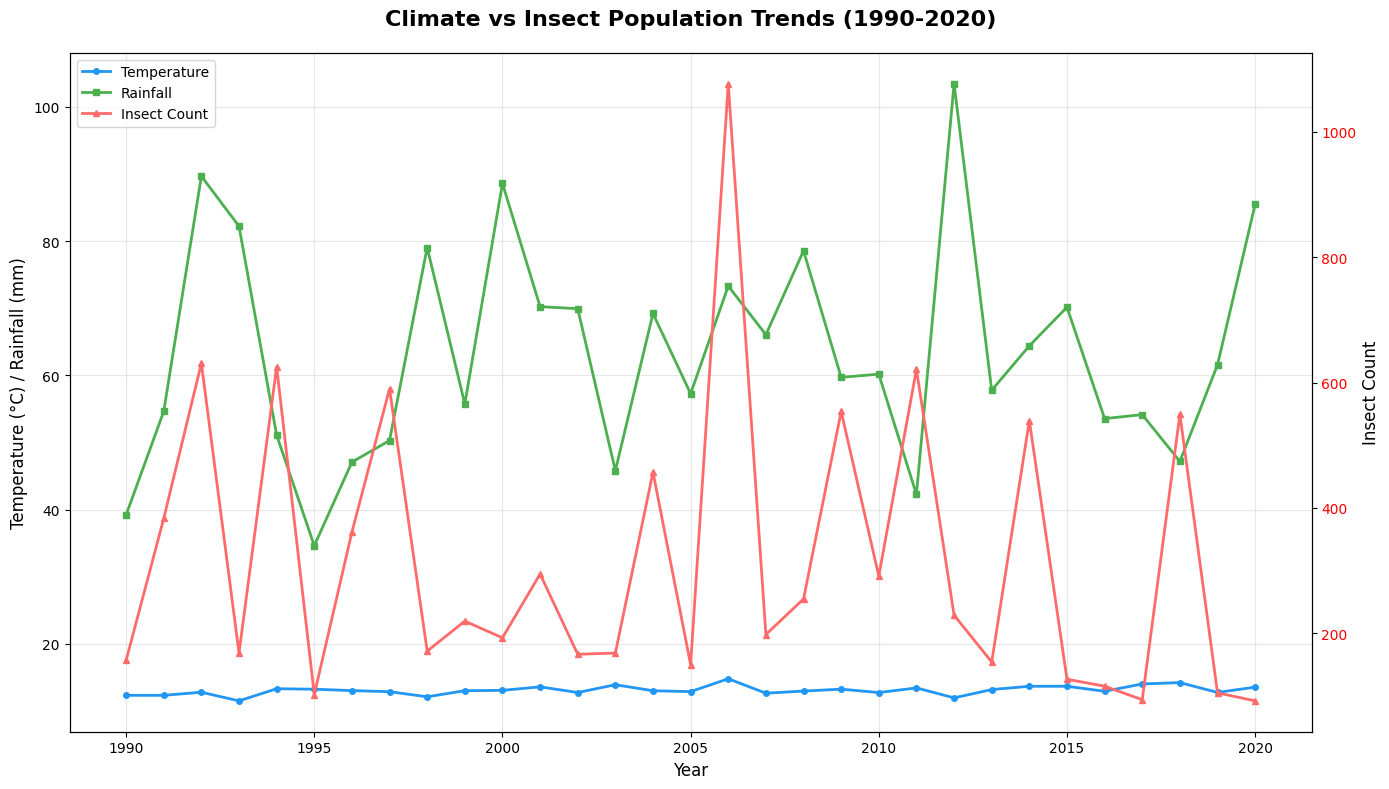

Yearly Trends Summary:
Temperature trend: 1.22°C change
Rainfall trend: 46.26mm change
Insect count trend: -64.5 change


In [97]:
import matplotlib.pyplot as plt

# Group by year and calculate means
yearly_avg = final_df_2.groupby('year').agg({
    'monthly_air_temp': 'mean',
    'monthly_rainfall': 'mean',
    'Total': 'mean'
}).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot temperature and rainfall on left y-axis
ax1.plot(yearly_avg['year'], yearly_avg['monthly_air_temp'], 
         color='#2196F3', linewidth=2, marker='o', markersize=4, label='Temperature')
ax1.plot(yearly_avg['year'], yearly_avg['monthly_rainfall'], 
         color='#4CAF50', linewidth=2, marker='s', markersize=4, label='Rainfall')

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Temperature (°C) / Rainfall (mm)', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, alpha=0.3)

# Create second y-axis for insect count
ax2 = ax1.twinx()
ax2.plot(yearly_avg['year'], yearly_avg['Total'], 
         color='#ff6b6b', linewidth=2, marker='^', markersize=4, label='Insect Count')
ax2.set_ylabel('Insect Count', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
plt.title('Climate vs Insect Population Trends (1990-2020)', fontsize=16, fontweight='bold', pad=20)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set x-axis to show every 5 years
ax1.set_xticks(range(1990, 2025, 5))

plt.tight_layout()
plt.show()

# Show correlation over time
print("Yearly Trends Summary:")
print(f"Temperature trend: {yearly_avg['monthly_air_temp'].iloc[-1] - yearly_avg['monthly_air_temp'].iloc[0]:.2f}°C change")
print(f"Rainfall trend: {yearly_avg['monthly_rainfall'].iloc[-1] - yearly_avg['monthly_rainfall'].iloc[0]:.2f}mm change")
print(f"Insect count trend: {yearly_avg['Total'].iloc[-1] - yearly_avg['Total'].iloc[0]:.1f} change")